In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [116]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df['datetime']= df['Date'].apply( lambda string1 : datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['datetime'].apply( lambda date1 : date1.weekday())
df['isoweek']= df['datetime'].apply( lambda date1 : date1.isocalendar().week)
df['AnScol']= df['datetime'].apply(lambda date1 : date1.year if date1.isocalendar().week>30 else date1.year-1)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,AnScol
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36,2011
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36,2011
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36,2011
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36,2011
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36,2011


In [117]:
setEts22=np.loadtxt('SetEtablissements.csv',delimiter=',',dtype='str')
# genfromtxt('col.txt')
len(setEts22)

83

In [118]:
df.shape

(127169, 13)

In [119]:
df = df[df['Nom du site'].isin(setEts22)]

In [120]:
df.shape

(112984, 13)

In [121]:
len(df['Nom du site'].value_counts())

83

<AxesSubplot:xlabel='isoweek'>

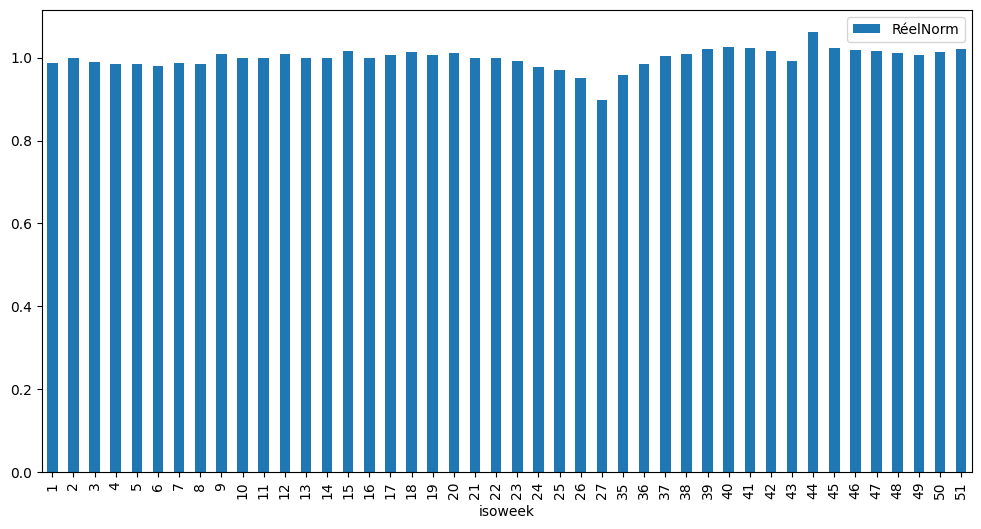

In [122]:
df[['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

In [123]:
df = df[((df['An']!=2021)|(df['isoweek']!=14))]
df.shape

(112973, 13)

In [124]:
df = df[((df['An']!=2020)|(~df['isoweek'].isin(range(13,26))))]
df.shape

(112000, 13)

In [125]:
df = df[df['joursem']!=2]
df.shape

(111472, 13)

In [126]:
df_global = df[df['AnScol']>2013][['datetime','Réel']].groupby(by='datetime').sum().reset_index()
df_global['joursem'] = df_global['datetime'].apply( lambda date1 : date1.weekday())
df_global['isoweek'] = df_global['datetime'].apply( lambda date1 : date1.isocalendar().week)
df_global['An'] = df_global['datetime'].apply(lambda date1 : date1.year)
df_global['Mois'] = df_global['datetime'].apply(lambda date1 : date1.month)
df_global['AnScol'] = df_global['datetime'].apply(lambda date1 : date1.year if date1.isocalendar().week>30 else date1.year-1)
df_global.head()

,datetime,Réel,joursem,isoweek,An,Mois,AnScol
0,2014-09-02,10160.0,1,36,2014,9,2014
1,2014-09-04,12477.0,3,36,2014,9,2014
2,2014-09-05,12907.0,4,36,2014,9,2014
3,2014-09-08,12521.0,0,37,2014,9,2014
4,2014-09-09,12688.0,1,37,2014,9,2014


In [127]:
df_global.shape

(1006, 7)

<AxesSubplot:xlabel='isoweek'>

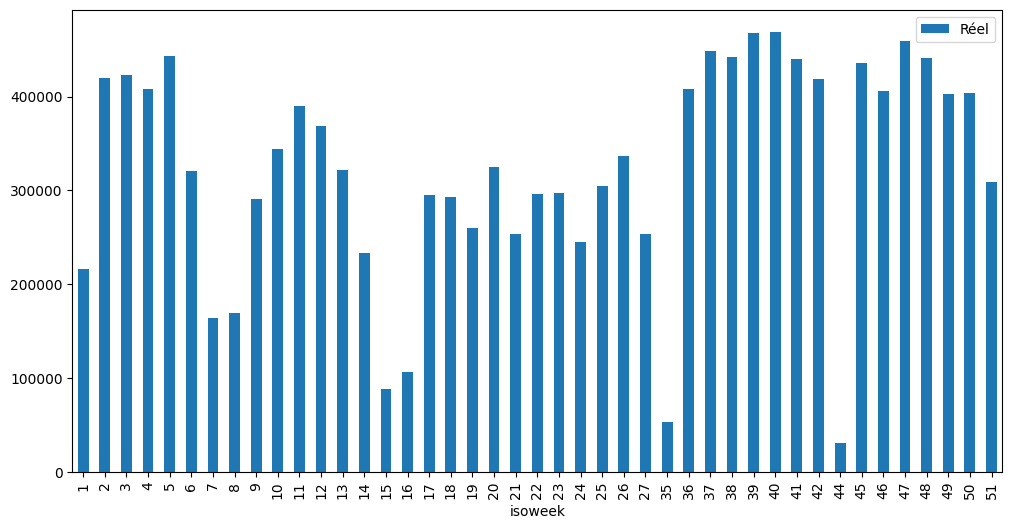

In [128]:
df_global[['Réel','isoweek']].groupby(by='isoweek').sum().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

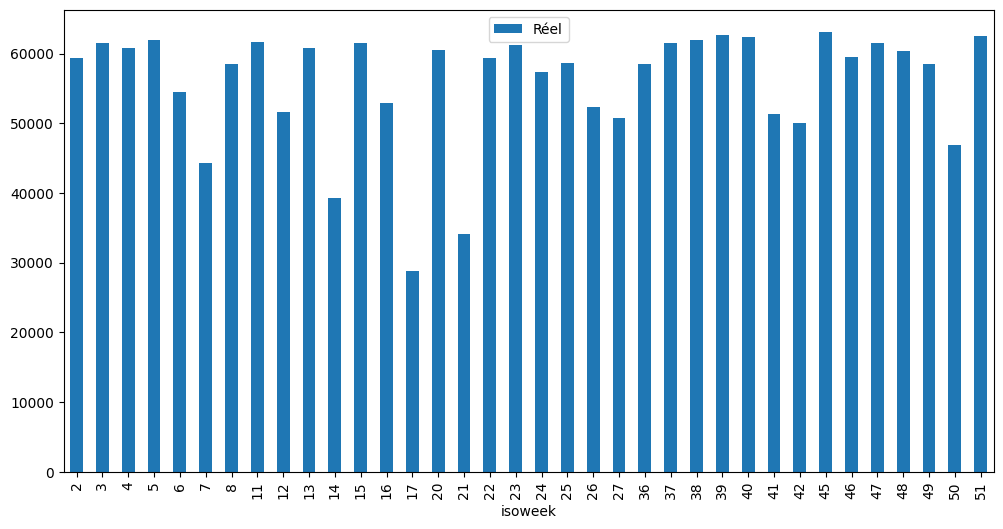

In [129]:
df_global[df_global['An']==2018][['Réel','isoweek']].groupby(by='isoweek').sum().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

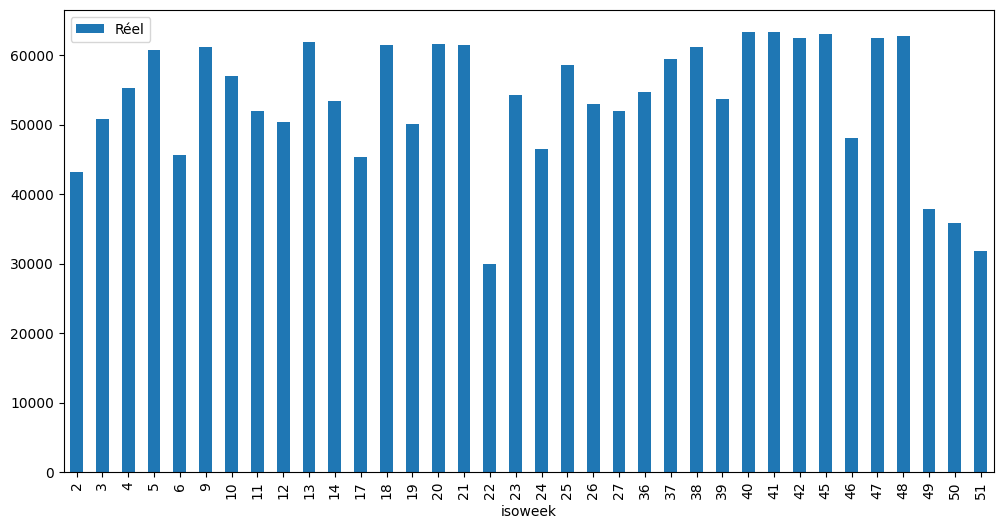

In [130]:
df_global[df_global['An']==2019][['Réel','isoweek']].groupby(by='isoweek').sum().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

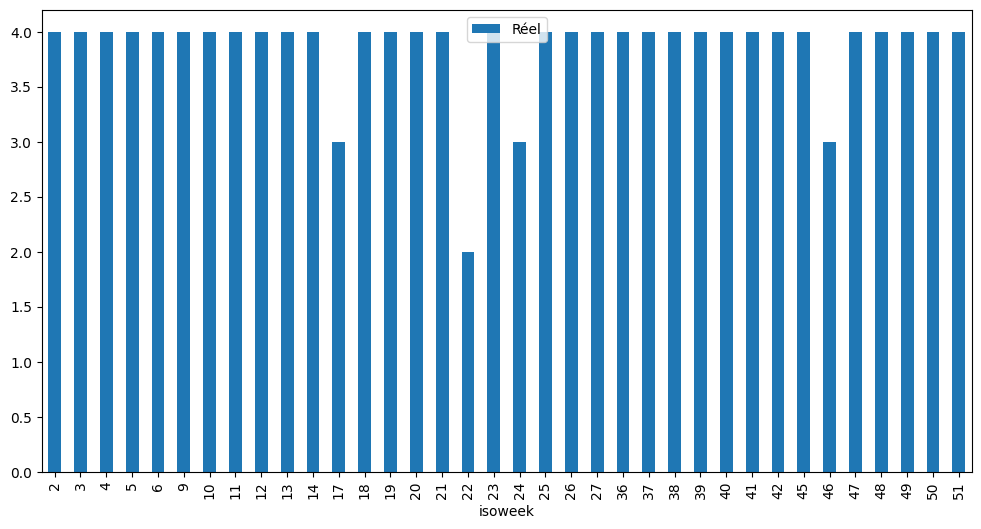

In [131]:
df_global[df_global['An']==2019][['Réel','isoweek']].groupby(by='isoweek').count().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Mois'>

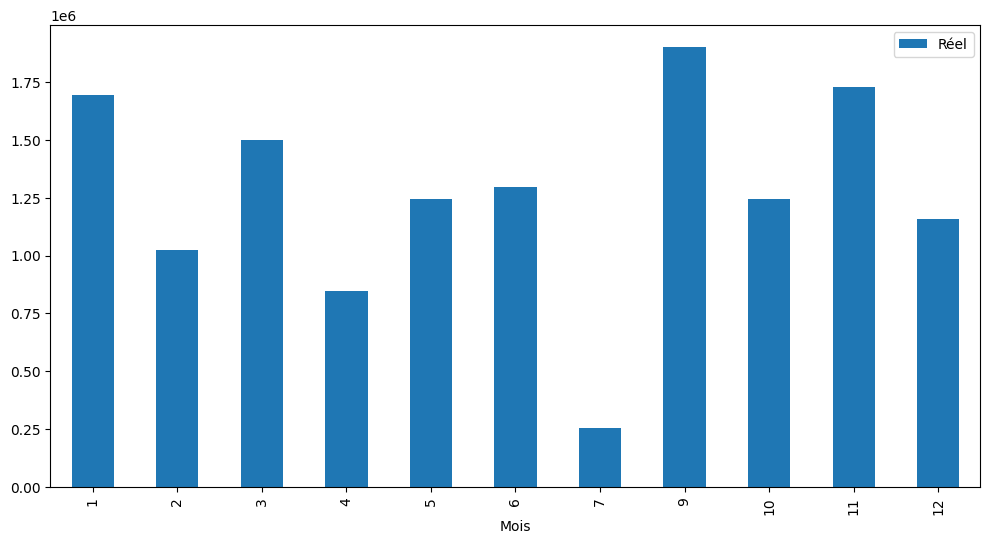

In [144]:
df_global[['Réel','Mois']].groupby(by='Mois').sum().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Mois'>

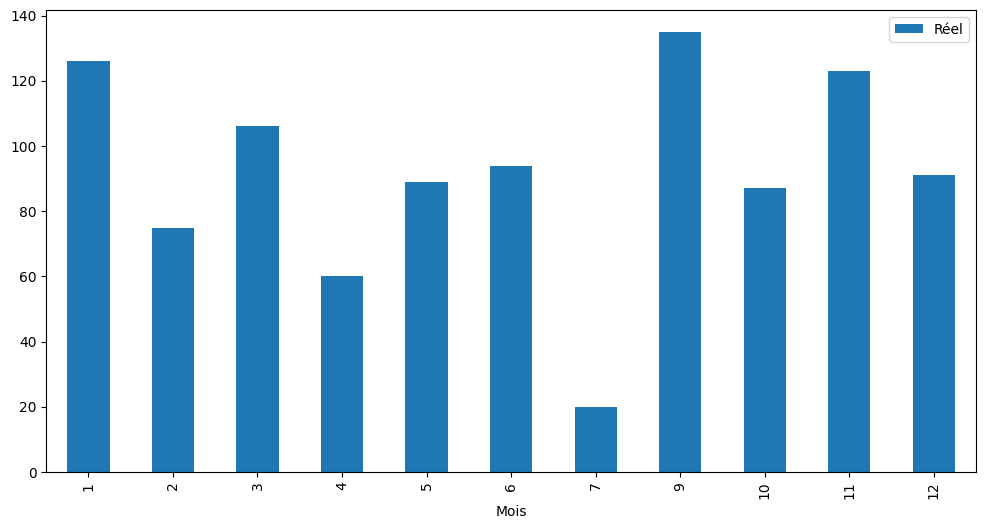

In [145]:
df_global[['Réel','Mois']].groupby(by='Mois').count().plot(kind='bar', figsize=(12,6))

In [150]:
df_global[['Réel','Mois']].groupby(by='Mois').mean()

,Réel
Mois,
1,13451.658730
2,13672.000000
3,14166.518868
4,14145.766667
5,13994.808989
6,13779.840426
7,12712.550000
9,14089.688889
10,14307.114943


In [151]:
df_global[['RéelNorm','Mois']].groupby(by='Mois').mean()

,RéelNorm
Mois,
1,0.956818
2,0.964062
3,0.992391
4,1.006742
5,0.998354
6,0.978015
7,0.881899
9,0.999542
10,1.007325


In [132]:
df_gref = df_global[['AnScol','Réel']].groupby(by='AnScol').median().reset_index()
df_gref.rename(columns={'Réel':'RéelRef', 'AnScol':'AnScolRef'},inplace=True)
df_gref['AnScol']=df_gref['AnScolRef']+1
df_gref

,AnScolRef,RéelRef,AnScol
0,2014,12506.5,2015
1,2015,13165.0,2016
2,2016,14869.0,2017
3,2017,14995.5,2018
4,2018,15034.0,2019
5,2019,15349.0,2020
6,2020,14829.5,2021
7,2021,14910.0,2022


In [133]:
df_gref.drop(columns=['AnScolRef'], inplace=True)

In [134]:
new_row = {'RéelRef':12506.5, 'AnScol':2014}
df_gref = df_gref.append(new_row, ignore_index=True)

C:\Users\Eric Bertrand\AppData\Local\Temp\ipykernel_5612\767490146.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gref = df_gref.append(new_row, ignore_index=True)


In [135]:
df_gref

,RéelRef,AnScol
0,12506.5,2015.0
1,13165.0,2016.0
2,14869.0,2017.0
3,14995.5,2018.0
4,15034.0,2019.0
5,15349.0,2020.0
6,14829.5,2021.0
7,14910.0,2022.0
8,12506.5,2014.0


In [136]:
df_global =  pd.merge(df_global, df_gref, how='left',on='AnScol')

In [137]:
df_global['RéelNorm']=df_global['Réel']/df_global['RéelRef']
df_global.head()

,datetime,Réel,joursem,isoweek,An,Mois,AnScol,RéelRef,RéelNorm
0,2014-09-02,10160.0,1,36,2014,9,2014,12506.5,0.812378
1,2014-09-04,12477.0,3,36,2014,9,2014,12506.5,0.997641
2,2014-09-05,12907.0,4,36,2014,9,2014,12506.5,1.032023
3,2014-09-08,12521.0,0,37,2014,9,2014,12506.5,1.001159
4,2014-09-09,12688.0,1,37,2014,9,2014,12506.5,1.014512


<AxesSubplot:xlabel='isoweek'>

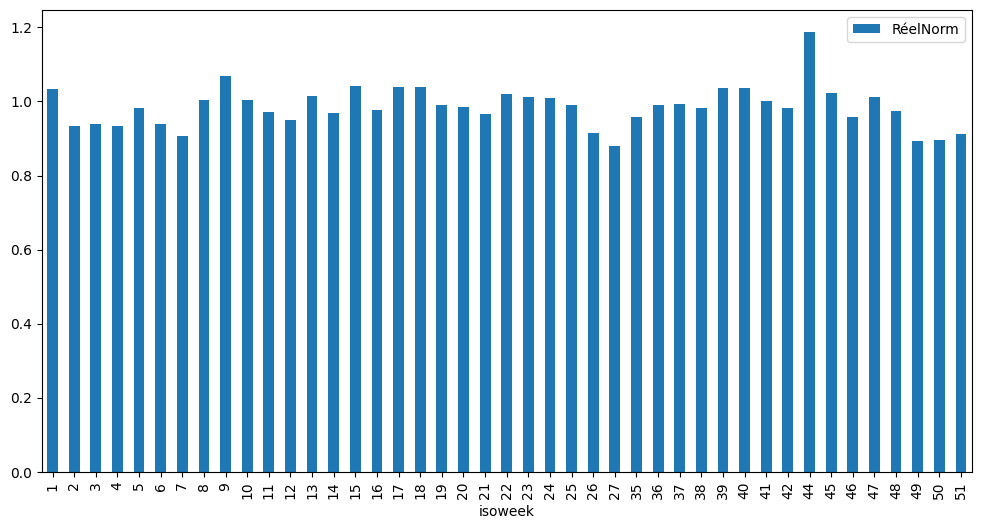

In [138]:
df_global[['RéelNorm','isoweek']].groupby(by='isoweek').mean().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

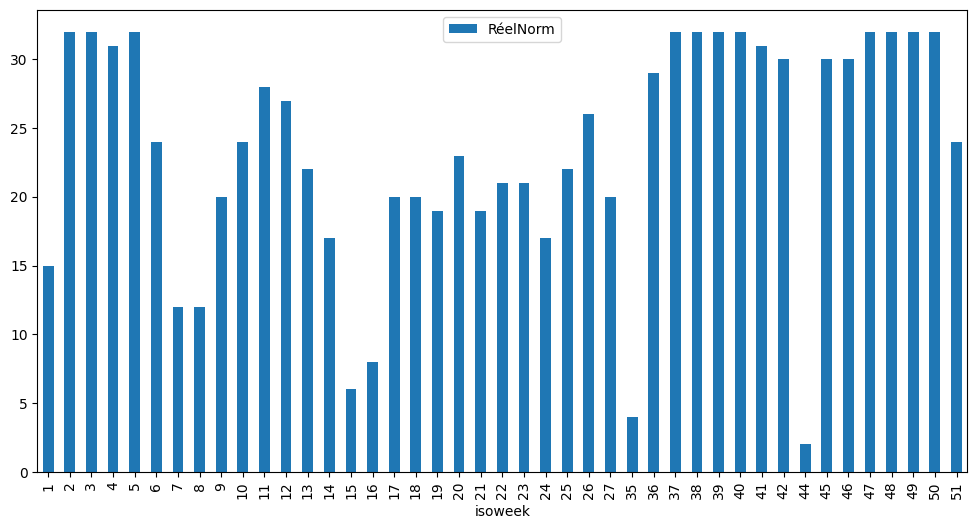

In [147]:
df_global[['RéelNorm','isoweek']].groupby(by='isoweek').count().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='An'>

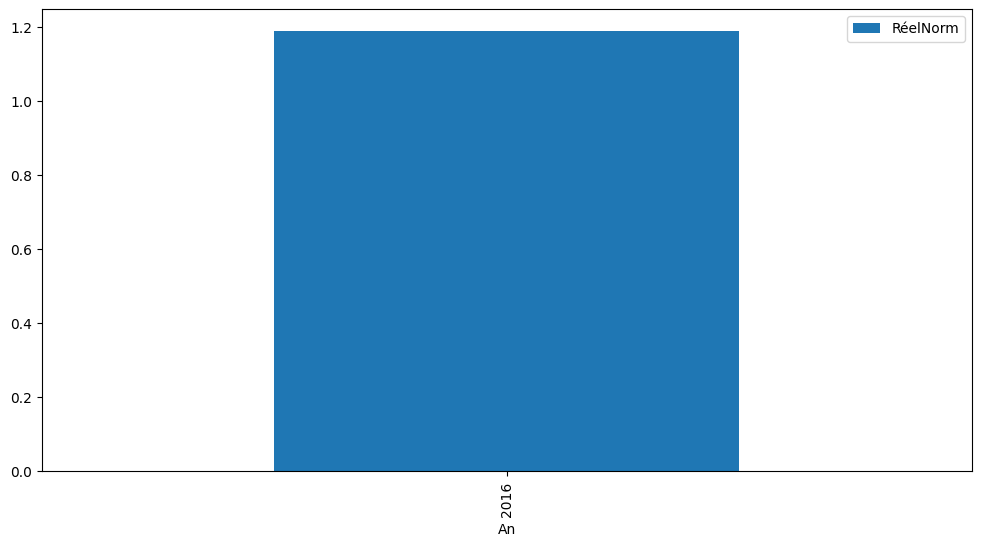

In [140]:
df_global[df_global['isoweek']==44][['RéelNorm','An']].groupby(by='An').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='An'>

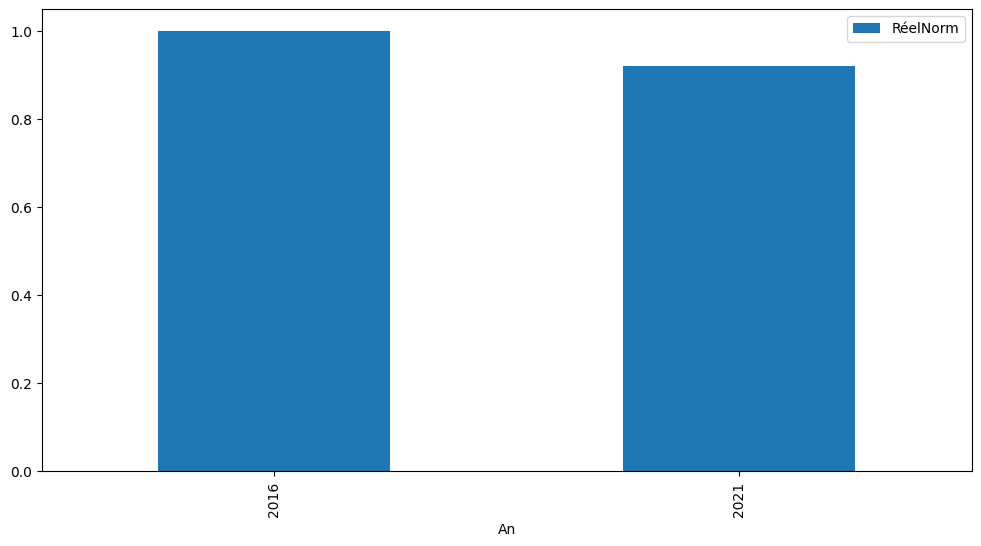

In [148]:
df_global[df_global['isoweek']==35][['RéelNorm','An']].groupby(by='An').median().plot(kind='bar', figsize=(12,6))

La semaine 44 est une semaine de Toussaint en général fériée sauf en 2016 ou les effectifs étaient élevés d'ou le mini-pic observé.

In [142]:
df_global[['RéelNorm','AnScol']].groupby(by='AnScol').median()

,RéelNorm
AnScol,
2014,1.000000
2015,1.052653
2016,1.129434
2017,1.008508
2018,1.002567
2019,1.020953
2020,0.966154
2021,1.005428


In [143]:
df_global[['RéelNorm','AnScol']].groupby(by='AnScol').mean()

,RéelNorm
AnScol,
2014,0.968847
2015,1.052424
2016,1.105602
2017,0.956607
2018,0.946436
2019,0.932168
2020,0.928047
2021,0.917979
